In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/sotuvlar.csv")
# 
# 
# df.sort('Date')
df = df.sort_values(by="Date", key=pd.to_datetime)
# df = df.set_index("Date", drop = True)
df["Date"] = pd.to_datetime(df.Date)
# df['month_day'] = df["Date"].apply(lambda x: x.strftime('%m-%d'))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


17 ta ustun haqida ma'lumot:
Invoice id - Joriy sotuv idsi (kompyuter generatsiya qilgan raqam)
Branch - Fillial (A,B yoki C)
City - Joylashgan shahar
Customer type - Mijoz turui - Member(Maxsus klent - karta ochtirgan), Normal - Oddiy klent
Gender - Jinsi
Product line - Sotib olingan mahsulot qaysi bo'limga tegishli:  Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
Unit price - Bir birlik mahsulot narxi
Quantity - Sotib olingan mahsulot soni
Tax - 5% li Soliq
Total - Soliqni qo'shgan holda  hisoblangan ummiy narx
Date - Sana
Time - Vaqt
Payment - To'lov turi (Cash-naqd, Credit-kredit karta, Ewallet-elektron hamyon)
COGS - Tannarxi
Gross margin percentage = (Jami daromad – sotilgan mahsulot tannarxi)/Jami daromad x 100
Gross income - yalpi daromad
rating - Reyting


In [5]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,14:43,Ewallet,874.98,4.761905,43.749,6.0
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,20:37,Cash,290.46,4.761905,14.523,6.7
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4


In [6]:
mon = df.groupby("Date").sum()
yan, fev , mar = mon.iloc[0:31], mon.iloc[31:59], mon.iloc[59:91]
yan["Month"], fev["Month"], mar["Month"] = "January", "February", "March"
con = pd.concat([yan, fev, mar])
con = con.reset_index()
con



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
0,2019-01-01,659.95,81,225.9610,4745.1810,4519.22,57.142857,225.9610,79.0,January
1,2019-01-02,357.08,48,92.6430,1945.5030,1852.86,38.095238,92.6430,48.4,January
2,2019-01-03,475.66,37,98.9585,2078.1285,1979.17,38.095238,98.9585,64.9,January
3,2019-01-04,310.46,32,77.3185,1623.6885,1546.37,28.571429,77.3185,39.1,January
4,2019-01-05,739.64,55,168.4135,3536.6835,3368.27,57.142857,168.4135,89.2,January
...,...,...,...,...,...,...,...,...,...,...
84,2019-03-26,558.64,52,93.4530,1962.5130,1869.06,61.904762,93.4530,86.1,March
85,2019-03-27,568.41,45,138.2295,2902.8195,2764.59,47.619048,138.2295,67.6,March
86,2019-03-28,455.25,48,106.1620,2229.4020,2123.24,47.619048,106.1620,70.5,March
87,2019-03-29,530.77,54,191.5830,4023.2430,3831.66,38.095238,191.5830,55.4,March


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f14b78611d0>],
      dtype=object)

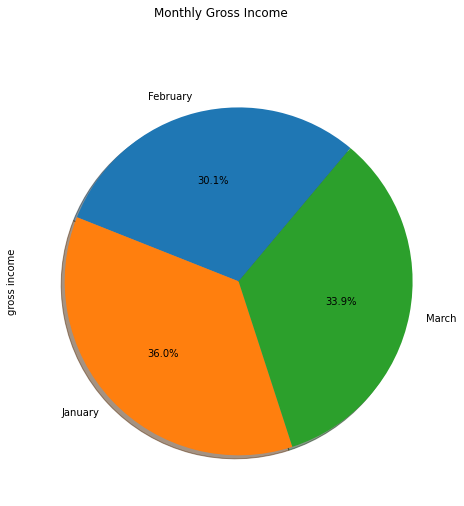

In [22]:
#Monthly income statistics
statm = con.groupby("Month")["gross income"].sum().plot(kind='pie', subplots=True, shadow = True,startangle=50,figsize=(20,8), autopct='%1.1f%%', title = "Monthly Gross Income")
statm

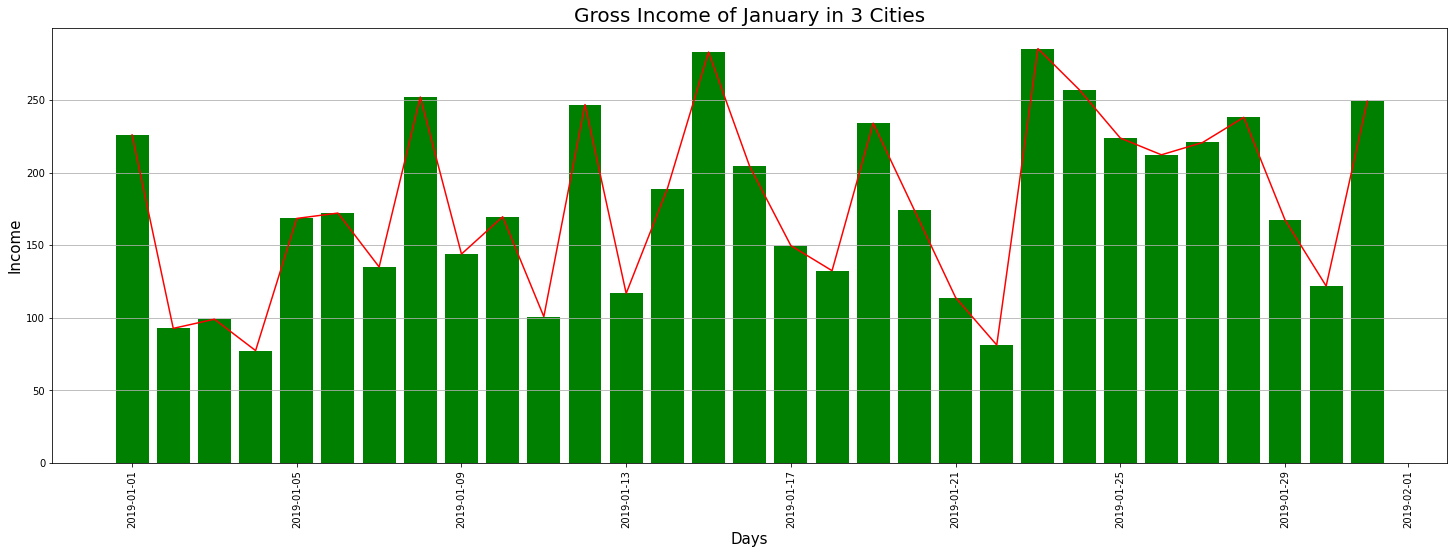

In [8]:
statj = con.loc[con["Month"] == "January"]
plt.figure(figsize=(25,8))
plt.plot(statj['Date'], statj['gross income'], color='red')
plt.xticks(rotation = 'vertical', size=10)
plt.xlabel("Days", size=15)
plt.ylabel("Income", size=15)
plt.title("Gross Income of January in 3 Cities", size = 20)
plt.bar(statj['Date'], statj['gross income'], color='green')
plt.grid(axis='y')
plt.show()


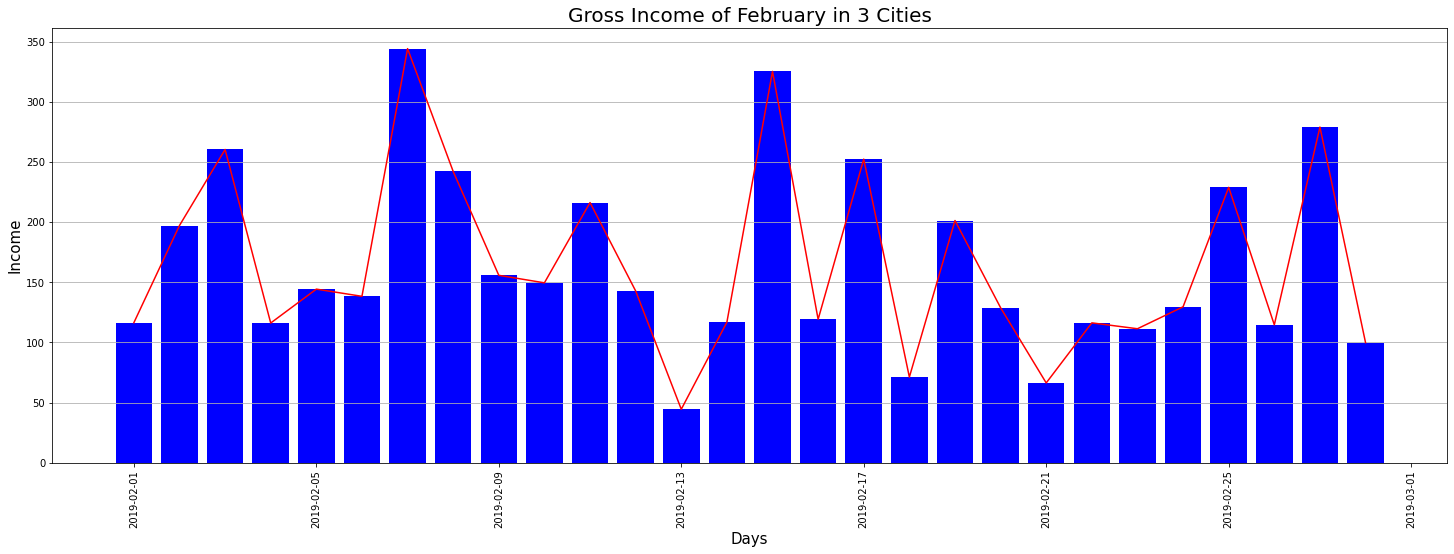

In [9]:
statf = con.loc[con['Month'] == "February"]
plt.figure(figsize=(25,8))
plt.plot(statf['Date'], statf['gross income'], color='red')
plt.xticks(rotation='vertical', size=10)
plt.xlabel('Days', size=15)
plt.ylabel('Income', size=15)
plt.title("Gross Income of February in 3 Cities",size=20)
plt.bar(statf['Date'], statf['gross income'], color='blue')
plt.grid(axis='y')
plt.show()

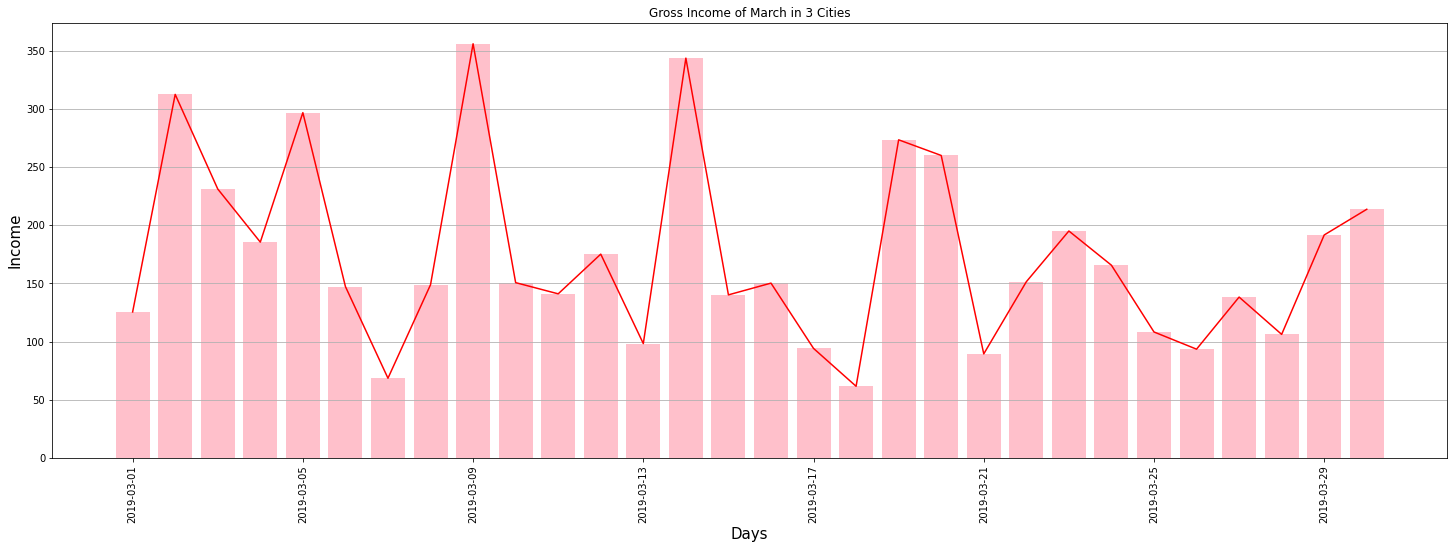

In [10]:
statm = con.loc[con['Month'] == 'March']
plt.figure(figsize=(25,8))
plt.plot(statm['Date'], statm['gross income'], color='red')
plt.xticks(rotation='vertical', size=10)
plt.xlabel("Days", size=15)
plt.ylabel('Income', size=15)
plt.title('Gross Income of March in 3 Cities')
plt.bar(statm['Date'], statm['gross income'], color='pink')
plt.grid(axis='y')
plt.show()

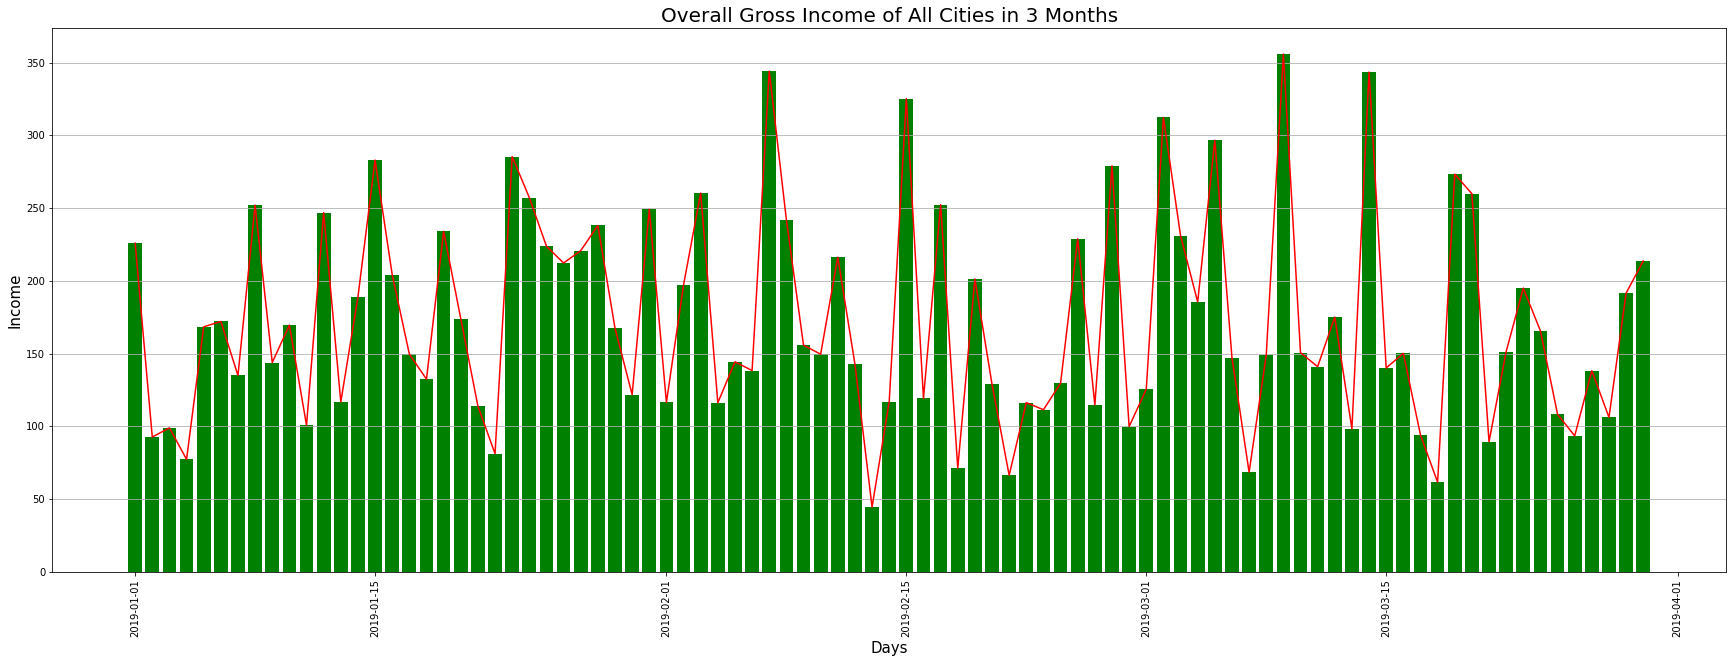

In [11]:
plt.figure(figsize=(30,10))
plt.plot(con['Date'], con['gross income'], color = 'red')
plt.xticks(rotation='vertical', size=10)
plt.xlabel('Days', size=15)
plt.ylabel('Income', size=15)
plt.title('Overall Gross Income of All Cities in 3 Months', size = 20)
plt.bar(con['Date'], con['gross income'], color = 'green')
plt.grid(axis='y')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f14b7afc990>],
      dtype=object)

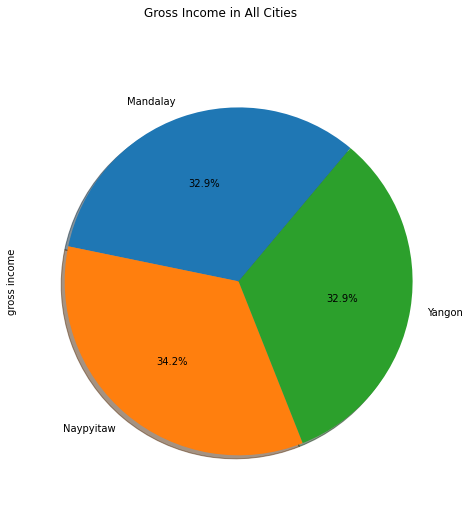

In [23]:
statc = df.groupby("City")["gross income"].sum().plot(kind='pie', subplots=True, shadow = True,startangle=50,figsize=(20,8), autopct='%1.1f%%', title = "Gross Income in All Cities")
statc

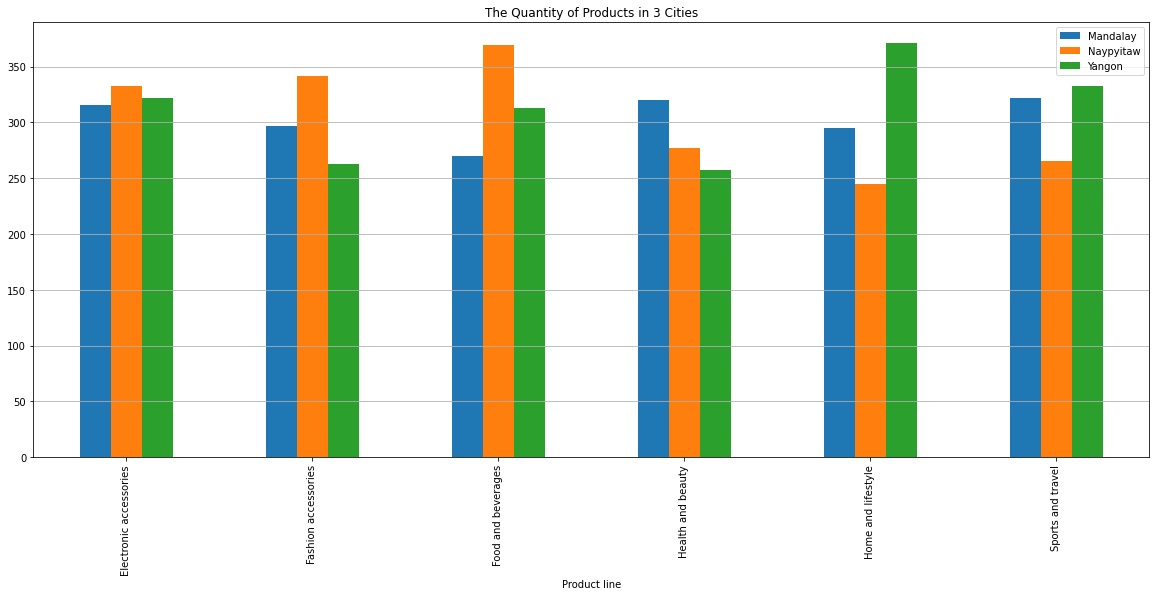

In [13]:
quant = df.groupby(["City", "Product line"]).sum()["Quantity"]
quant.unstack(level=0).plot(kind ='bar', figsize=(20,8), title="The Quantity level of all Products in 3 Cities")
plt.grid(axis='y')
plt.legend()

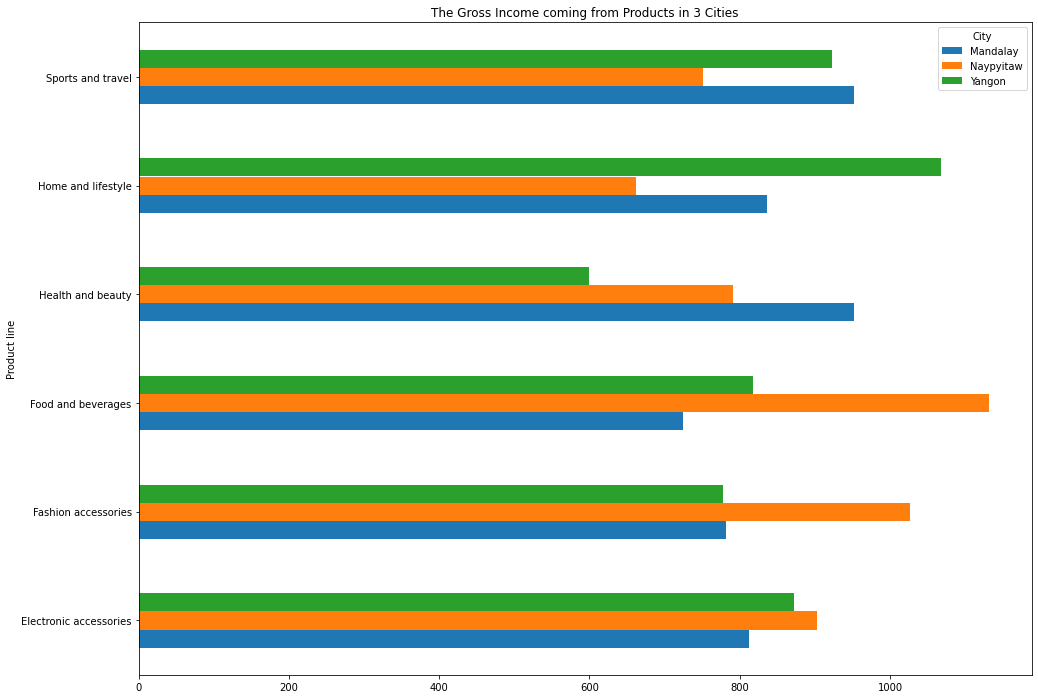

In [14]:
income = df.groupby(["City", "Product line"]).sum()["gross income"]
income.unstack(level=0).plot(kind='barh', figsize=(16,12),title="The Gross Income coming from Products in 3 Cities" )
plt.show()

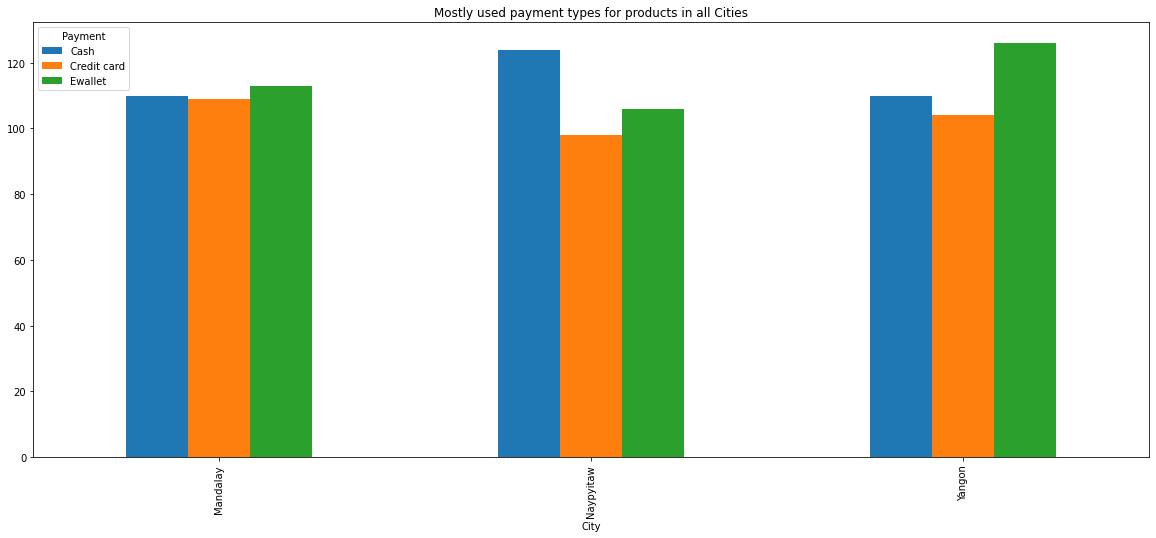

In [45]:
cash = df.groupby(['Payment', 'City'])['Product line'].count().unstack(level=0).plot(kind='bar', figsize=(20,8), title='Mostly used payment types for products in all Cities')

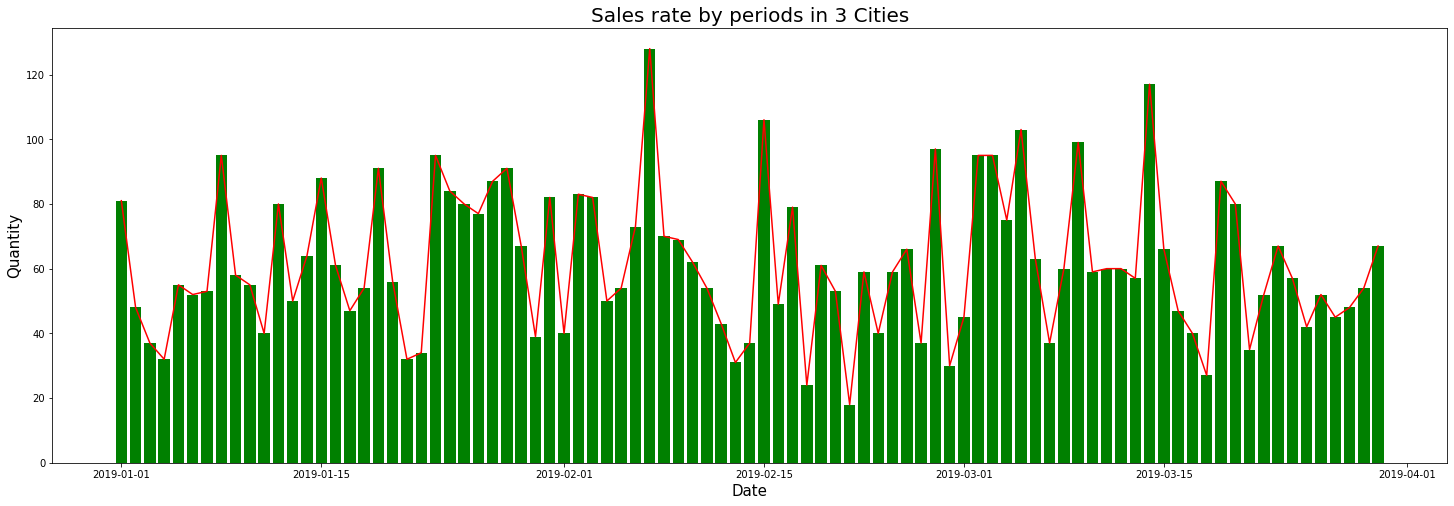

In [56]:
quant = con.groupby('Month')
plt.figure(figsize=(25,8))
plt.bar(con['Date'], con['Quantity'], color='green')
plt.xlabel('Date', size=15)
plt.ylabel('Quantity', size = 15)
plt.title("Sales rate by periods in 3 Cities", size=20)
plt.plot(con['Date'], con['Quantity'], color='red')
plt.show()

In [57]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,14:43,Ewallet,874.98,4.761905,43.749,6.0
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,20:37,Cash,290.46,4.761905,14.523,6.7
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


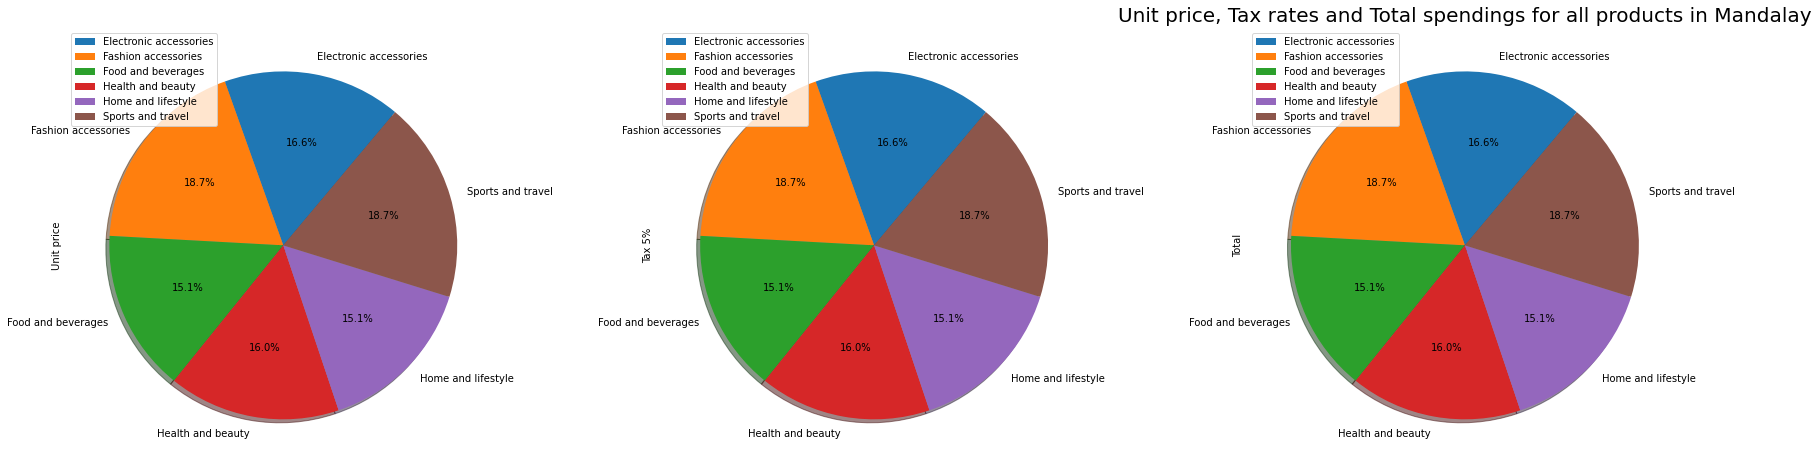

In [68]:
city = df.loc[df['City'] == 'Mandalay']
city1 = df.loc[df['City'] == 'Naypyitaw']
city2 = df.loc[df['City'] == 'Yangon']
fin = city.groupby("Product line")['Unit price', 'Tax 5%', 'Total'].count().plot(kind='pie', subplots=True, shadow = True,startangle=50,figsize=(30,8), autopct='%1.1f%%')
plt.title("Unit price, Tax rates and Total spendings for all products in Mandalay", size = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


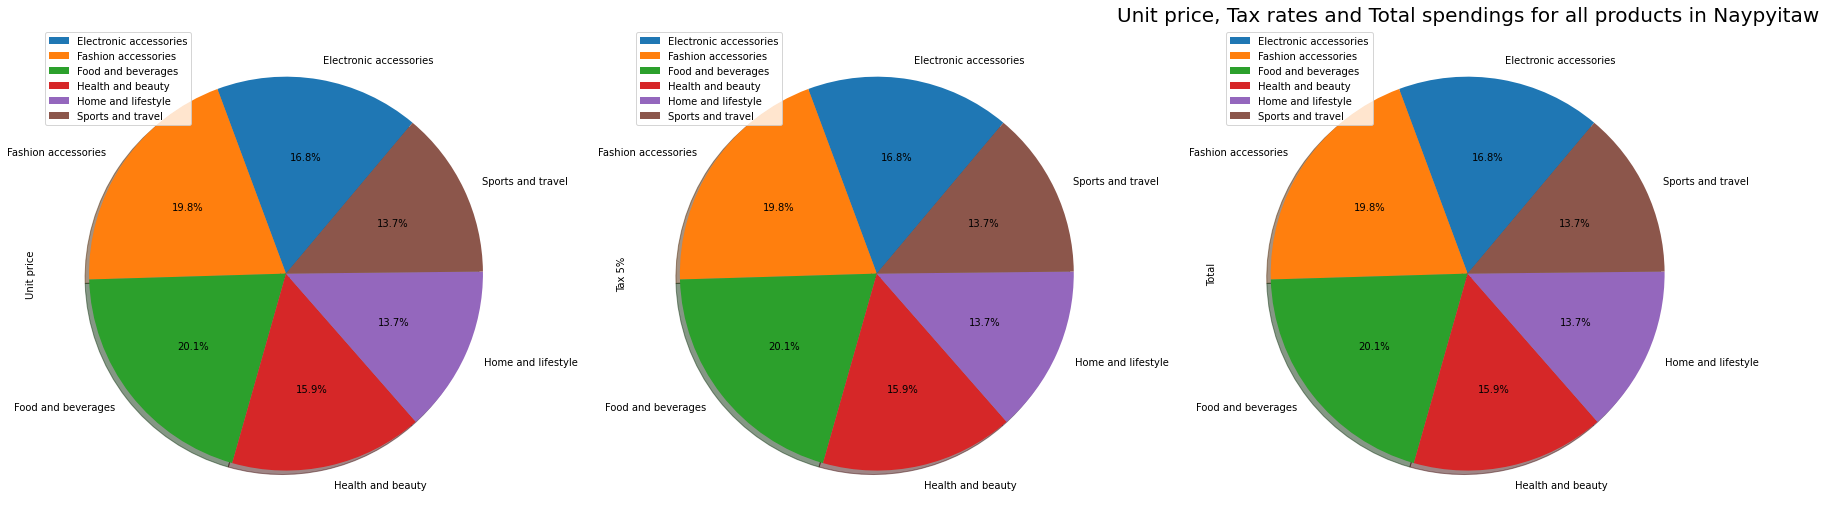

In [66]:
fin1 = city1.groupby("Product line")['Unit price', 'Tax 5%', 'Total'].count().plot(kind='pie', subplots=True, shadow = True,startangle=50,figsize=(30,10), autopct='%1.1f%%')
plt.title("Unit price, Tax rates and Total spendings for all products in Naypyitaw", size=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


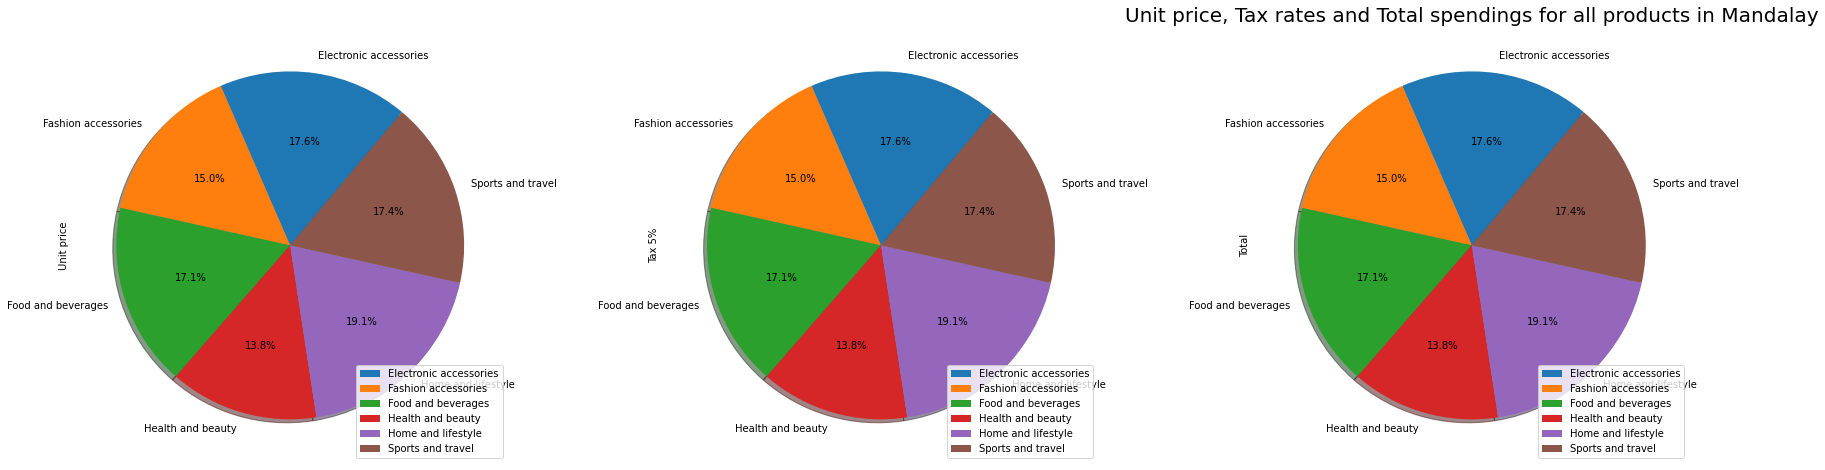

In [69]:
fin2 = city2.groupby("Product line")['Unit price', 'Tax 5%', 'Total'].count().plot(kind='pie', subplots=True, shadow = True,startangle=50,figsize=(30,8), autopct='%1.1f%%')
plt.title("Unit price, Tax rates and Total spendings for all products in Mandalay", size=20)
plt.show()